<img src="./logo_UNSAM.jpg" align="right" width="250" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº7
#### Nicolás Sewrjugin y Sofía Gervasi


# Introducción

En el procesamiento digital de señales, los filtros lineales invariantes en el tiempo (*LTI*) constituyen una herramienta esencial para modificar o analizar el contenido espectral de una señal discreta. Estos filtros se describen comúnmente mediante ecuaciones en diferencias, que relacionan la salida $y[n]$ con las muestras actuales y pasadas de la entrada $x[n]$. En el caso de los filtros **FIR (*Finite Impulse Response*)**, la salida depende únicamente de valores presentes y pasados de la entrada, sin recurrencia sobre las salidas anteriores, lo cual garantiza su estabilidad y una fase lineal en muchos casos.

La ecuación general de un filtro FIR de orden $N$ puede expresarse como:

\begin{equation}
y(n) = \sum_{k=0}^{N} b_k \, x(n - k)
\end{equation}

donde los coeficientes $b_k$ determinan la forma de la respuesta impulsiva del sistema y, por tanto, su respuesta en frecuencia.

Para el análisis de estos sistemas, se utiliza la **transformada Z**, que permite describir la relación entre la entrada y la salida en el dominio complejo:

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \sum_{k=0}^{N} b_k \, z^{-k}
\end{equation}

La **respuesta en frecuencia** del sistema se obtiene evaluando la función de transferencia sobre el círculo unitario ($z = e^{j\omega}$):

\begin{equation}
H(e^{j\omega}) = T(z)\big|_{z = e^{j\omega}} = \sum_{k=0}^{N} b_k \, e^{-j\omega k}
\end{equation}

A partir de esta expresión, pueden calcularse el **módulo** y la **fase** de la respuesta:

\begin{equation}
|H(e^{j\omega})| = \sqrt{ \text{Re}\{H(e^{j\omega})\}^2 + \text{Im}\{H(e^{j\omega})\}^2 }
\end{equation}

\begin{equation}
\angle H(e^{j\omega}) = \tan^{-1}\left( \frac{\text{Im}\{H(e^{j\omega})\}}{\text{Re}\{H(e^{j\omega})\}} \right)
\end{equation}

En general, se utiliza el hecho de extraer factor común el punto medio de $H(e^{j\omega})$, brindando fácilmente el producto de un término que contiene a la fase y de otro que representa al módulo.

\begin{equation}
H(e^{j\omega}) = e^{-j\omega \frac{N}{2}} \cdot A(\omega)
\end{equation}

El análisis de la respuesta en frecuencia, tanto en módulo como en fase, permite caracterizar de forma completa el comportamiento espectral del sistema. El módulo $|H(e^{j\omega})|$ indica en qué medida el filtro amplifica o atenúa las distintas componentes de frecuencia de la señal de entrada, revelando así si el sistema actúa como un filtro pasa bajos, pasa altos, elimina banda o pasabanda. Por su parte, la fase $\angle H(e^{j\omega})$ describe los desplazamientos temporales que cada componente sufre al atravesar el sistema, lo cual resulta esencial para evaluar la distorsión de fase y el retardo introducido. En particular, los filtros FIR con coeficientes simétricos presentan una fase lineal, lo que implica un retardo constante y, por ende, ausencia de distorsión temporal en la señal filtrada.

En esta práctica se analizan cuatro sistemas discretos definidos por ecuaciones en diferencias que representan distintos tipos de filtros FIR: filtros de **media móvil** de diferentes longitudes y filtros de **diferenciación discreta**. Para cada uno se calculará su función de transferencia $T(z)$, su respuesta en frecuencia (módulo y fase), y se realizará una simulación numérica utilizando *Numpy* para validar los resultados teóricos:

\begin{equation}
 a) y(n) = x(n−3)+x(n−2)+x(n−1)+x(n)
\end{equation}
\begin{equation}
 b) y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)
\end{equation}
\begin{equation}
 c) y(n)=x(n)−x(n−1)
\end{equation}
\begin{equation}
 d) y(n)=x(n)−x(n−2)
\end{equation}


El estudio de estos sistemas permite observar cómo los filtros de media móvil actúan como **promediadores y atenuadores de altas frecuencias**, mientras que los filtros de diferencia generan **efectos de realce o cancelación** de componentes de baja frecuencia. 


# Análisis y desarrollo


### Cálculo de $T(Z) = \frac{Y(Z)}{X(Z)}$ para las ecuaciones en diferencias

In [1]:
from IPython.display import IFrame
IFrame("./.pdf", width=800, height=600)

### Cálculo de la respuesta en frecuencia de módulo y fase

### Simulación y validación de la respuesta en frecuencia con Numpy

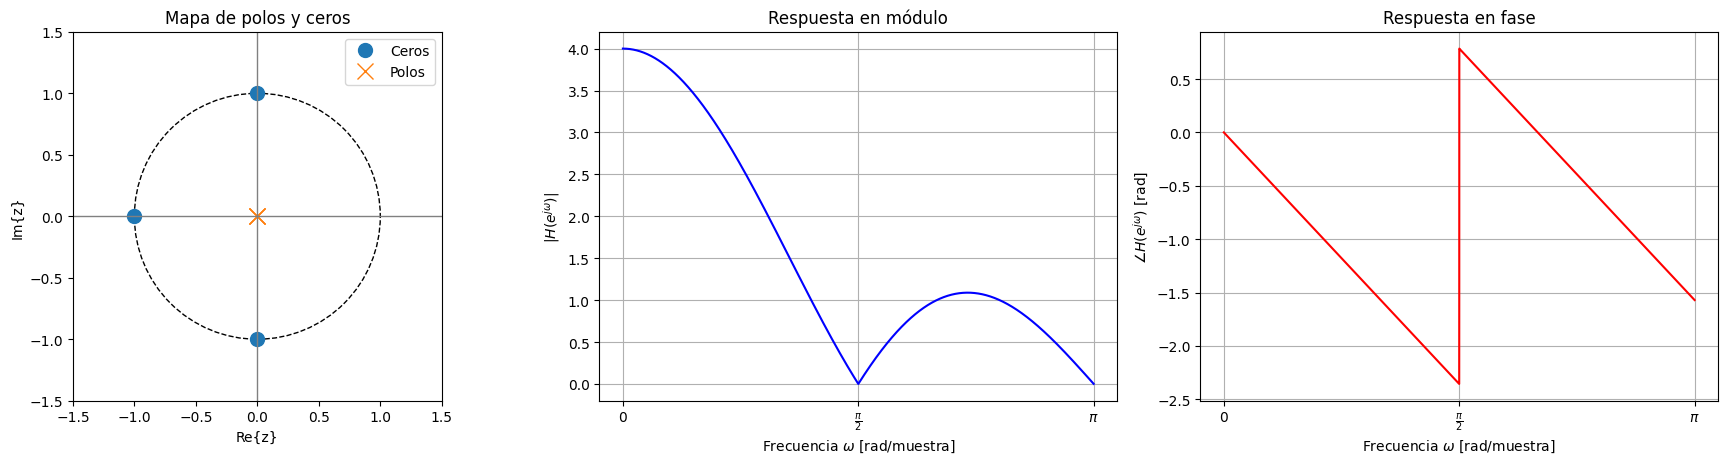

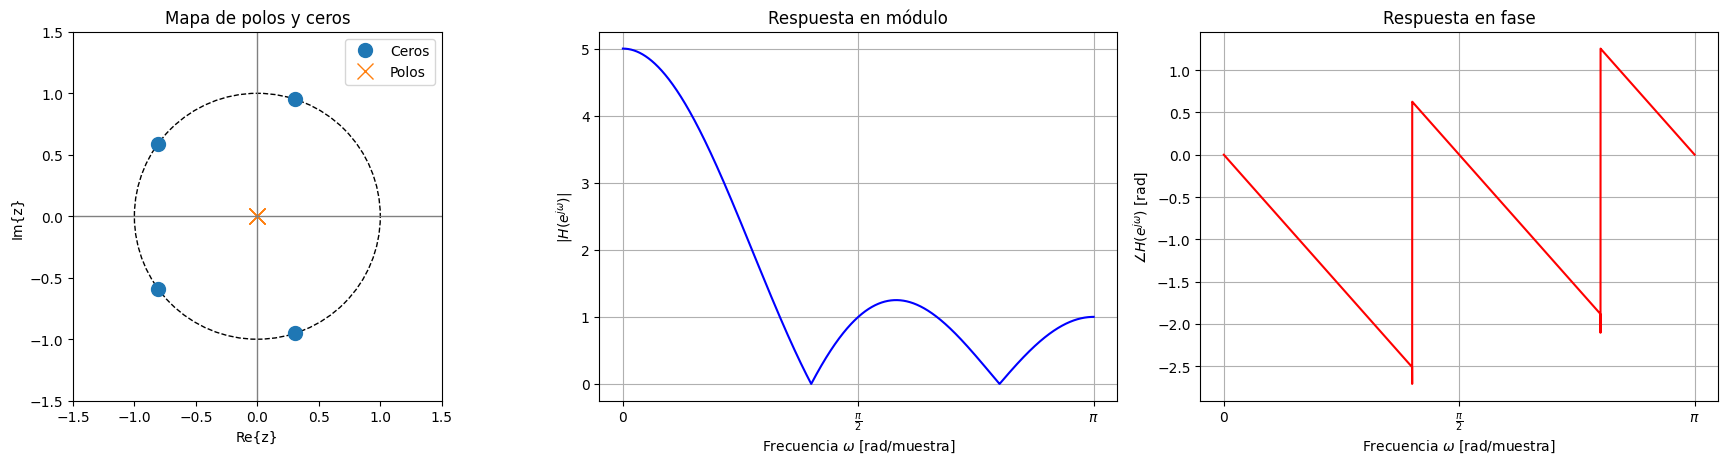

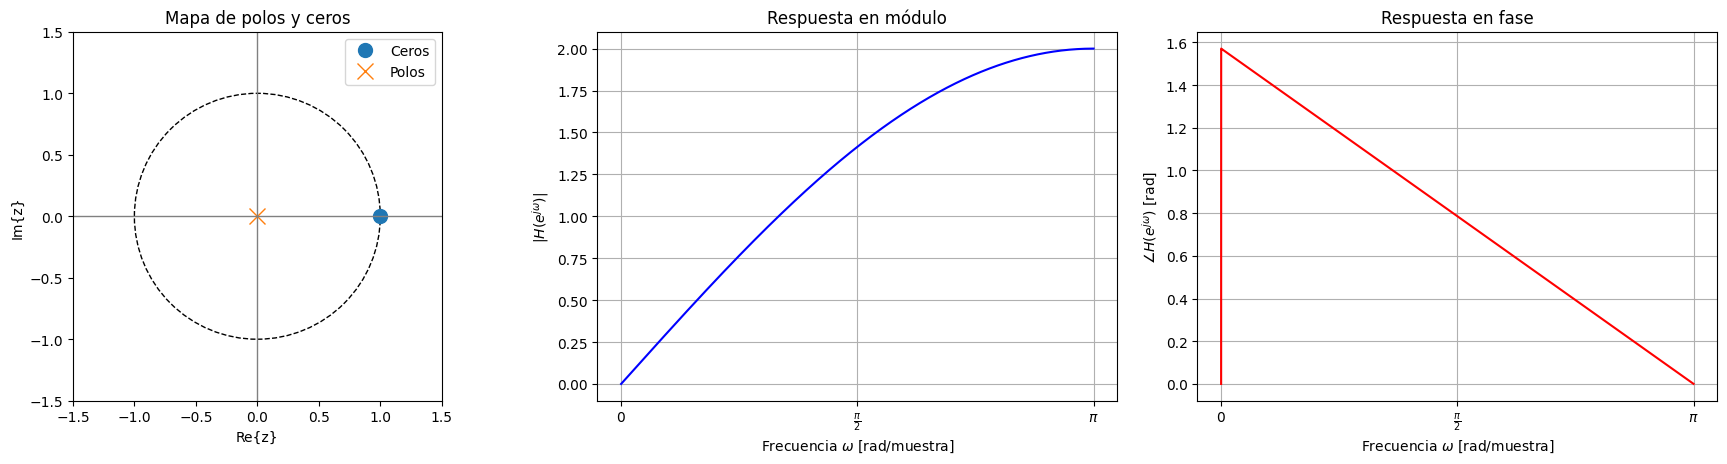

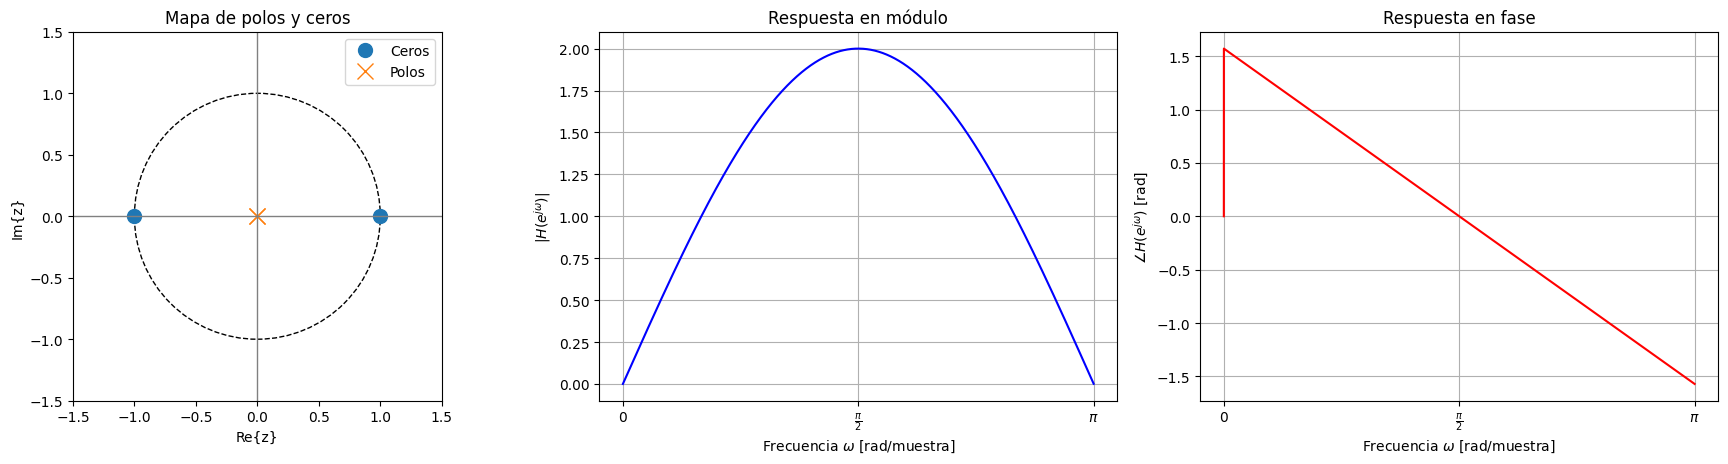

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_freq_response(num, den):
    zeros, poles, _ = signal.tf2zpk(num, den)
    w, h = signal.freqz(num, den, worN=8000)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Mapa de polos y ceros
    axs[0].plot(np.real(zeros), np.imag(zeros), 'o', label='Ceros', markersize=10)
    axs[0].plot(np.real(poles), np.imag(poles), 'x', label='Polos', markersize=12)
    axs[0].axhline(0, color='gray', lw=1)
    axs[0].axvline(0, color='gray', lw=1)
    axs[0].set_title("Mapa de polos y ceros")
    axs[0].set_xlabel(r'Re{z}')
    axs[0].set_ylabel(r'Im{z}')
    axs[0].legend()

    # Dibujar círculo unidad
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='dashed')
    axs[0].add_artist(circle)
    axs[0].set_xlim(-1.5, 1.5)
    axs[0].set_ylim(-1.5, 1.5)
    axs[0].set_aspect('equal', adjustable='box')

    # Respuesta en módulo
    axs[1].plot(w, np.abs(h), 'b')
    axs[1].set_title("Respuesta en módulo")
    axs[1].set_xlabel(r'Frecuencia $\omega$ [rad/muestra]')
    axs[1].set_ylabel(r'$|H(e^{j\omega})|$')
    axs[1].grid(True)
    axs[1].set_xticks([0, np.pi/2, np.pi])
    axs[1].set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])

    # Respuesta en fase
    axs[2].plot(w, np.angle(h), 'r')
    axs[2].set_title("Respuesta en fase")
    axs[2].set_xlabel(r'Frecuencia $\omega$ [rad/muestra]')
    axs[2].set_ylabel(r'$\angle H(e^{j\omega})$ [rad]')
    axs[2].grid(True)
    axs[2].set_xticks([0, np.pi/2, np.pi])
    axs[2].set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#%% Sistema A
num = [1, 1, 1, 1]  # 1 + z + z^2 + z^3 
den = [1, 0, 0, 0]  # z^3 

plot_freq_response(num, den)

#%% Sistema B

num_b = [1, 1, 1, 1, 1]  # 1 + z + z^2 + z^3 + z^4
den_b = [1, 0, 0, 0, 0]  # z^4

plot_freq_response(num_b, den_b)

#%% Sistema C

num_c = [1, -1]  # -1 + z
den_c = [1, 0]      # z

plot_freq_response(num_c, den_c)

#%% Sistema D

num_d = [1, 0, -1]  # -1 + z^2
den_d = [1, 0, 0]         

plot_freq_response(num_d, den_d)

- Para el primer sistema, 
- Para el segundo sistema,
- Para el tercer sistema,
- Para el cuarto sistema,

# Conclusiones

